In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('DDP4_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.663540
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.387216
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.823909
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.301030
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.725842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.114695
4243,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
4244,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
4245,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000


In [5]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4243,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4244,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4245,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = dataset.iloc[:,-1]
Y

0       3.663540
1       4.387216
2       4.823909
3       3.301030
4       3.725842
          ...   
4242    4.114695
4243    4.000000
4244    4.000000
4245    4.000000
4246    4.000000
Name: pIC50, Length: 4247, dtype: float64

In [7]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP12,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,...,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP702,PubchemFP704,PubchemFP709,PubchemFP710,PubchemFP712,PubchemFP755,PubchemFP818
0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0
4243,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4244,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0
4245,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0


In [8]:
X.to_csv('descriptor_list.csv', index = False)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8649217900498194

In [11]:
Y_pred = model.predict(X)
Y_pred

array([4.19103966, 5.85725183, 4.84398346, ..., 4.06650539, 4.02058836,
       4.05315622])

In [12]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.34
Coefficient of determination (R^2): 0.86


In [13]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

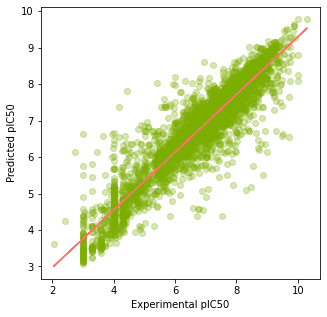

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [15]:
import pickle

In [16]:
pickle.dump(model, open('DDP4_model.pkl', 'wb'))